# Build an ANN model to predict Delivery Status for a logistic firm


(Refer fedex dataset)
link: [fedex_data](https://drive.google.com/file/d/1yGPY8m73_U3i5HGJerV4eI07XOPe3INg/view?usp=sharing)



In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [3]:
#loading fedex_data
path = "C:/Users/usach/Desktop/AI assignments/Module 7/fedex.csv"
fedex_data = pd.read_csv(path)

In [4]:
#checking for Nan's / nulls
fedex_data.isnull().sum().sum()

245353

In [5]:
# dropping the rows having NaN values and check
fedex_data = fedex_data.dropna()
fedex_data.isnull().sum().sum()

0

In [6]:
fedex_data.head(5)

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [7]:
#columns
fedex_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [8]:
#viewing target
fedex_data['Delivery_Status'].head(5)

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Delivery_Status, dtype: float64

C:\Users\usach\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Status', ylabel='count'>

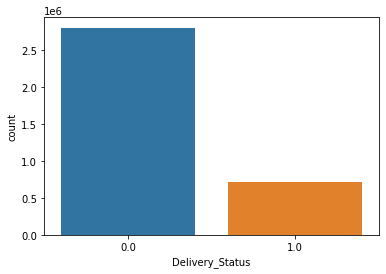

In [9]:
#Summary of Delivery_Status
sns.countplot(fedex_data['Delivery_Status'],label="Count")

In [10]:
#combining source and destination column into new Path column
fedex_data['Path'] = fedex_data[['Source', 'Destination']].apply(lambda x: '-'.join(x), axis = 1)
fedex_data['Path'].head(5)

0    IAD-TPA
1    IAD-TPA
2    IND-BWI
3    IND-BWI
4    IND-BWI
Name: Path, dtype: object

In [11]:
#droping 'Source' and 'Destination' along with 'Carrier_Name' since 'Carrier_Num' is already present
fedex_data.drop(['Source', 'Destination', 'Carrier_Name'], axis = 1, inplace= True)

In [12]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fedex_data['Path'] = le.fit_transform(fedex_data['Path'])

In [13]:
#independent and dependent features
X  = fedex_data.iloc[:, fedex_data.columns != 'Delivery_Status'].values #independent
y = fedex_data['Delivery_Status'].values   #dependent

In [14]:
#Viewing Independent and dependent columns
print(X[:,:5])
print(y)

[[2.008e+03 1.000e+00 3.000e+00 4.000e+00 2.003e+03]
 [2.008e+03 1.000e+00 3.000e+00 4.000e+00 7.540e+02]
 [2.008e+03 1.000e+00 3.000e+00 4.000e+00 6.280e+02]
 ...
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 8.210e+02]
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 7.180e+02]
 [2.008e+03 6.000e+00 1.900e+01 4.000e+00 1.127e+03]]
[0. 1. 0. ... 0. 0. 1.]


In [15]:
#Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [16]:
#Scaling independent variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# viewing scaled data
X_train[:,:5]

array([[ 0.        ,  0.86185735,  1.74614772,  1.03721038, -1.42591428],
       [ 0.        ,  0.27694058,  0.83287268, -0.47163277, -0.78813567],
       [ 0.        ,  1.44677413, -0.53703988, -0.47163277,  0.60168157],
       ...,
       [ 0.        ,  0.27694058,  1.63198834, -0.47163277,  1.06079907],
       [ 0.        , -0.3079762 ,  0.49039454,  0.03131495,  1.49290966],
       [ 0.        , -1.47780975,  1.06119144,  0.53426266, -0.47444   ]])

In [18]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2465516, 12)
X_test (1056651, 12)
y_train (2465516,)
y_test (1056651,)


In [19]:
#defining the model
#adding the input and first hidden layer
def build_model():
  model = Sequential()
  model.add(Dense(10,activation='relu',input_shape=(12,)))
  #adding the second hidden layer
  model.add(Dense(6, activation='relu'))
  #adding the output layer
  model.add(Dense(1, activation='sigmoid'))
  #compiling model
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [20]:
#fitting model
classifier = KerasClassifier(build_fn = build_model , batch_size = 512 , nb_epoch = 20)

In [21]:
#evaluating model
accuracy = cross_val_score(estimator = classifier , X=X_train, y=y_train, cv =10 , n_jobs = -1)

In [22]:
print("Mean accuracy:",format(100*accuracy.mean(),".2f"),"%")

Mean accuracy: 99.98 %
